In [ ]:
#Exercise3Problem1 U2421569C Hein San

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
Traindata = pd.read_csv('train(1).csv')

In [10]:
houseNumData = pd.DataFrame(Traindata[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])

In [13]:
houseNumData.skew()
#Skewness = 0: Then normally distributed.
#Skewness > 0: Then more weight in the left tail of the distribution.
#skewness < 0: Then more weight in the right tail of the distribution.
#Almost of the variables are normally distributed except LotArea which skews more to the right tail of the distribution

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

In [17]:
houseNumData.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137,180921.195890
std,9981.264932,525.480383,438.705324,213.804841,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,795.750000,334.500000,129975.000000
50%,9478.500000,1464.000000,991.500000,480.000000,163000.000000
75%,11601.500000,1776.750000,1298.250000,576.000000,214000.000000
max,215245.000000,5642.000000,6110.000000,1418.000000,755000.000000


C:\Users\heins\AppData\Local\Temp\ipykernel_17552\3977097119.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(houseNumData[var], color = colors[count], ax = axes[count,1])
C:\Users\heins\AppData\Local\Temp\ipykernel_17552\3977097119.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(houseNumDa

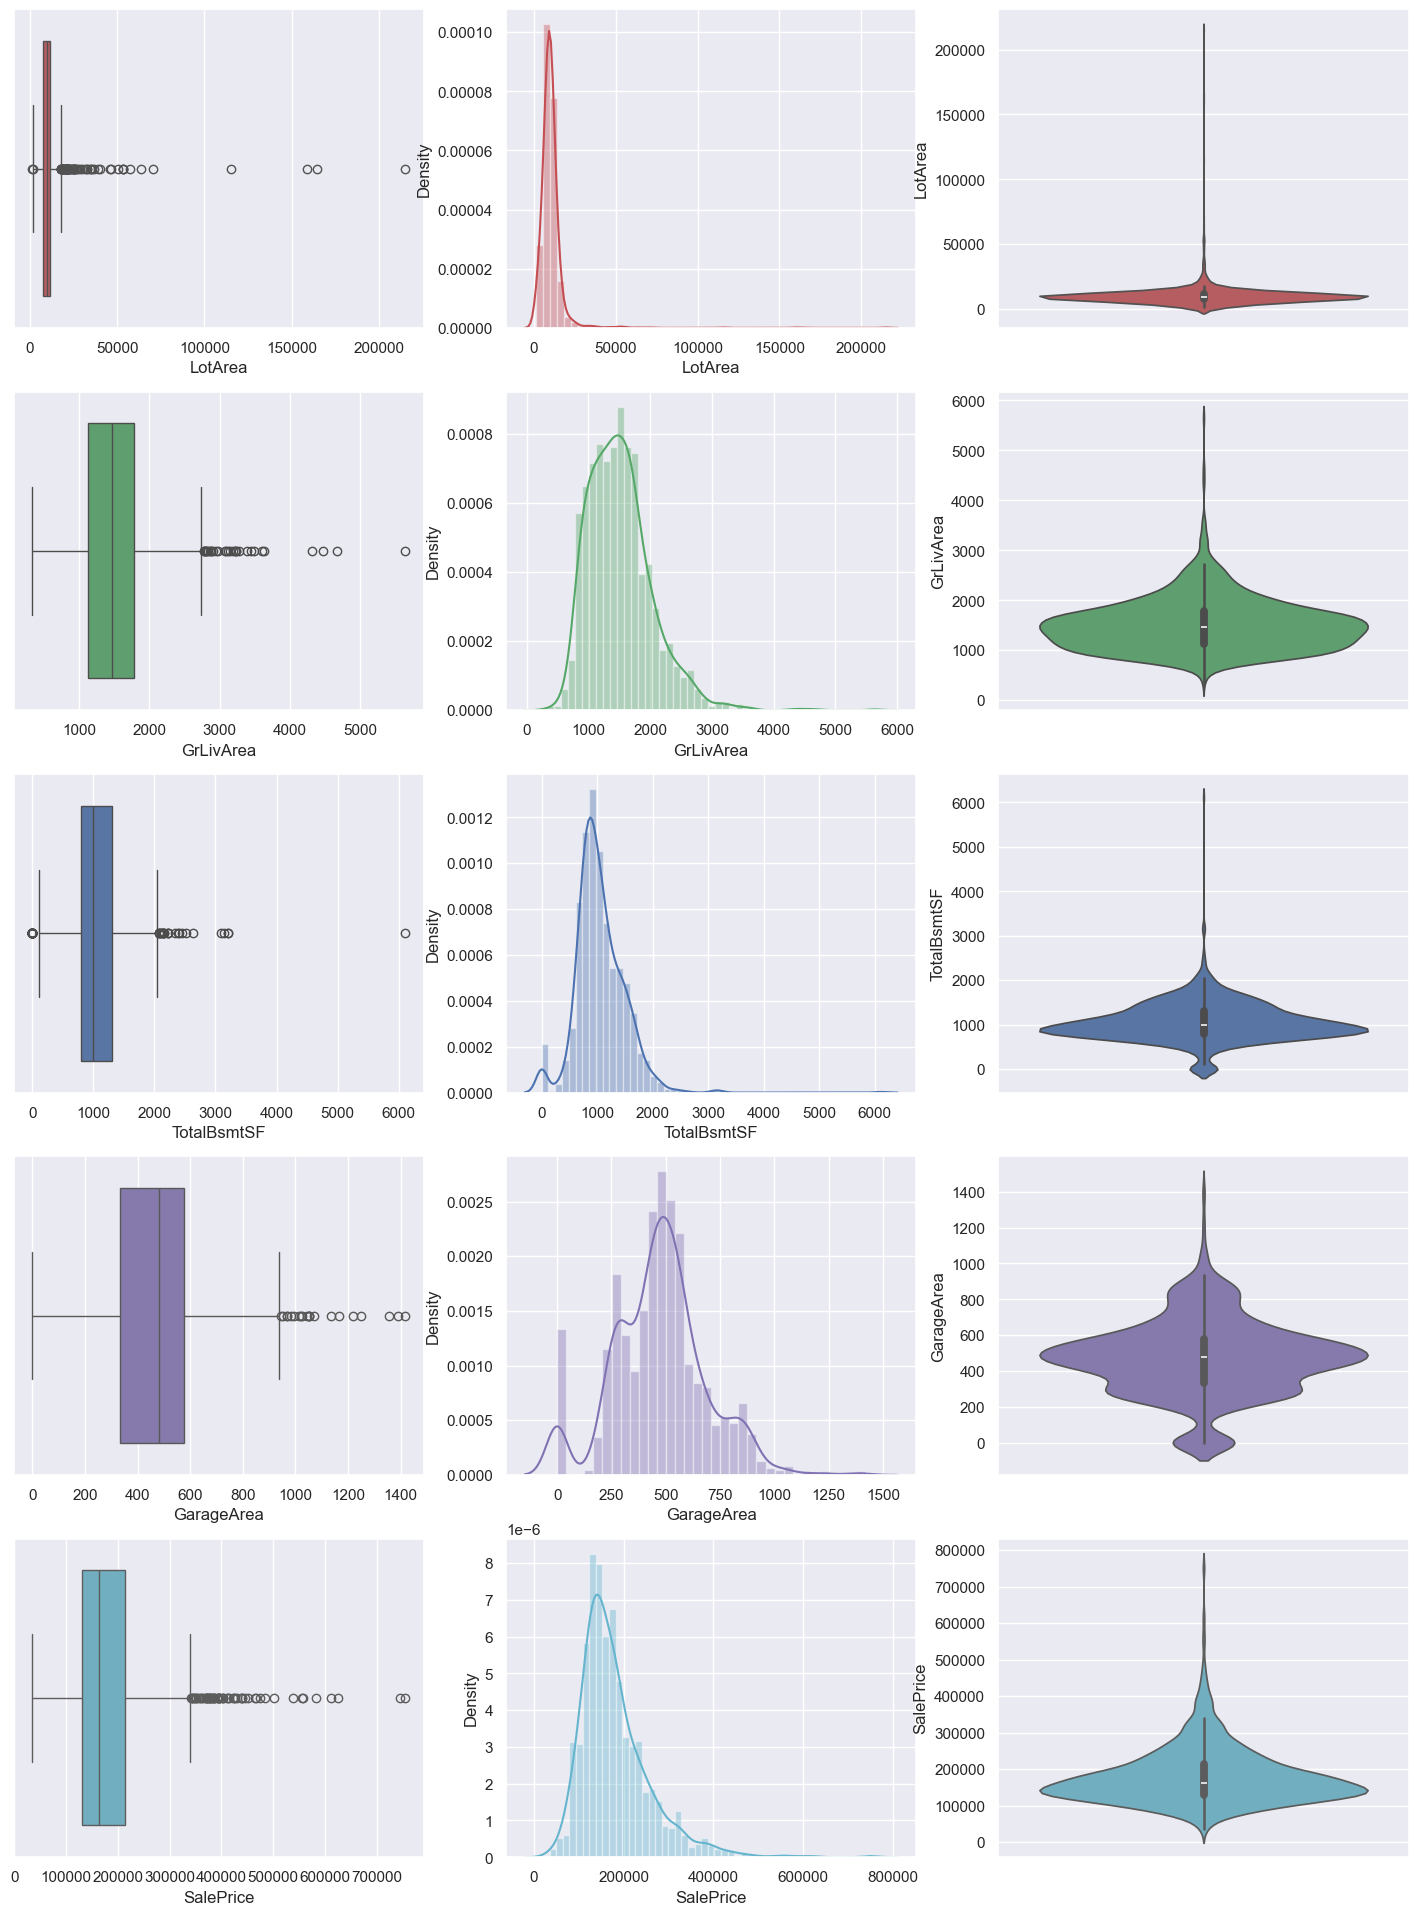

In [27]:
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(18, 24))
colors = ["r", "g", "b", "m", "c"]

count = 0
for var in houseNumData:
    sb.boxplot(houseNumData[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(houseNumData[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(houseNumData[var], color = colors[count], ax = axes[count,2])
    count += 1

In [43]:
q1=houseNumData.quantile(0.25)
q3=houseNumData.quantile(0.75)
IQR=q3-q1
outliers = houseNumData[((houseNumData<(q1-1.5*IQR)) | (houseNumData>(q3+1.5*IQR)))]
outlier_counts = outliers.count()
print(f"Number of outliers: {outlier_counts}")
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
#LotArea has the most number of outliers

Number of outliers: LotArea        69
GrLivArea      31
TotalBsmtSF    61
GarageArea     21
SalePrice      61
dtype: int64
max outlier value: LotArea        215245.0
GrLivArea        5642.0
TotalBsmtSF      6110.0
GarageArea       1418.0
SalePrice      755000.0
dtype: float64
min outlier value: LotArea          1300.0
GrLivArea        2775.0
TotalBsmtSF         0.0
GarageArea        947.0
SalePrice      341000.0
dtype: float64


In [47]:
# Calculate the complete  correlation matrix
houseNumData.corr()
#GrLivArea has the strongest correlation with Saleprice

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


<Axes: >

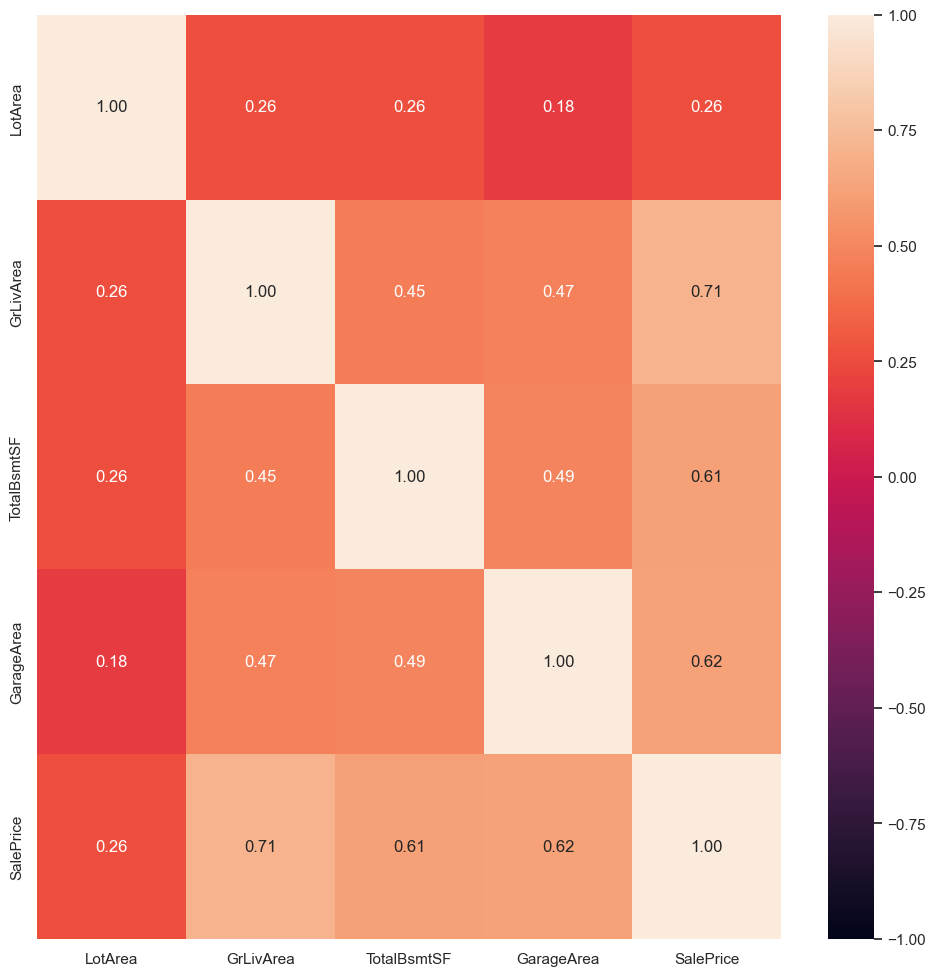

In [45]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

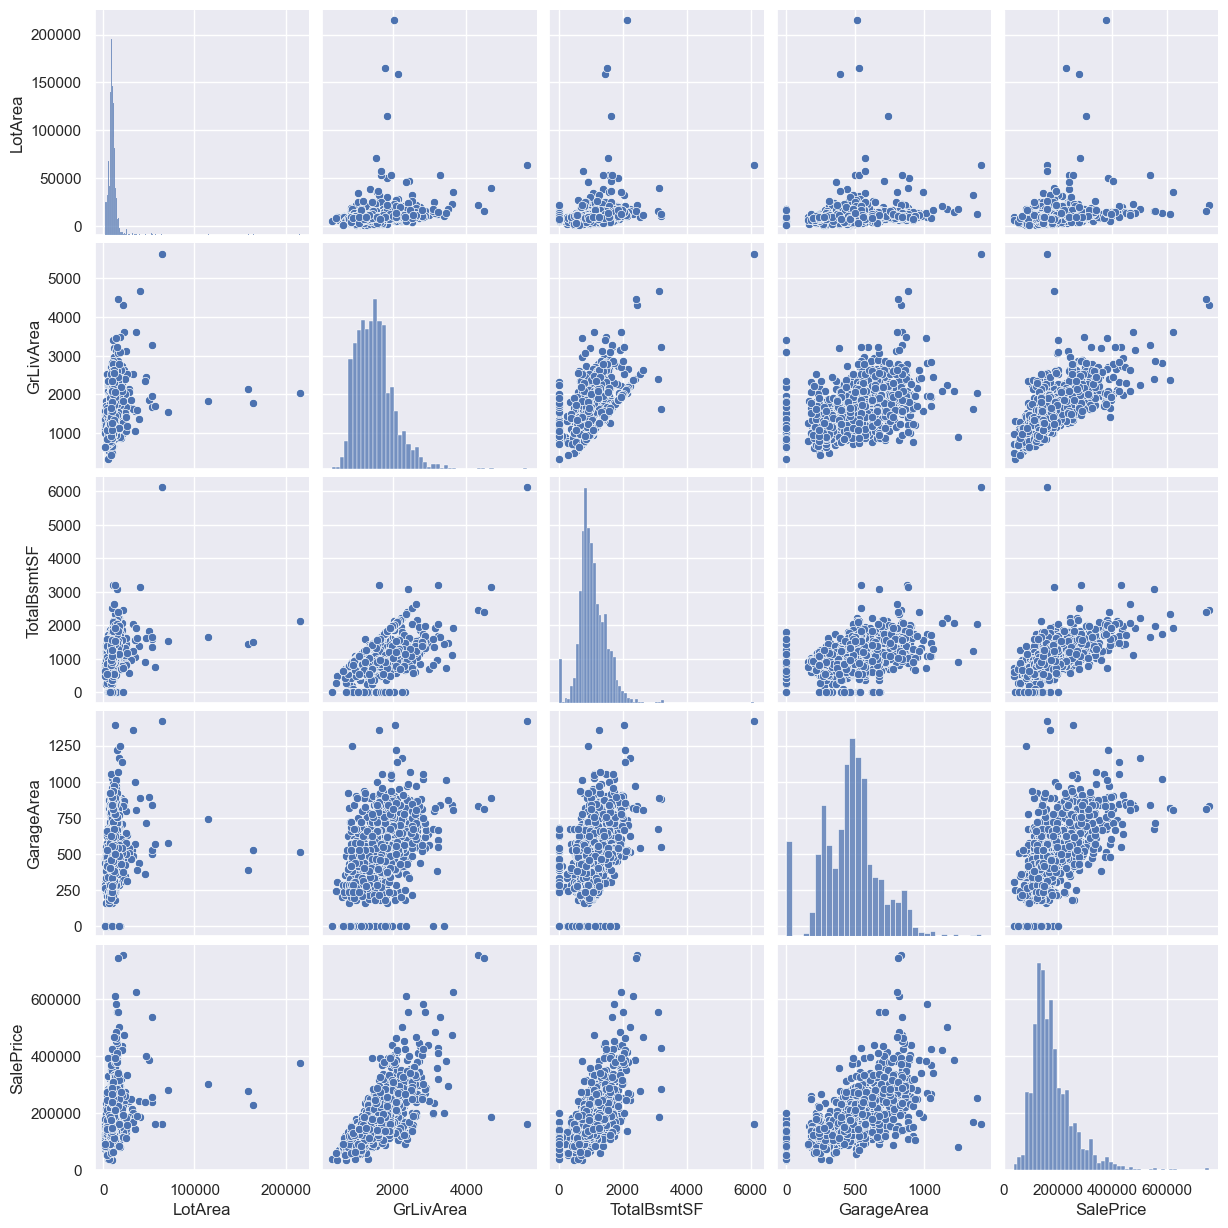

In [49]:
sb.pairplot(data = houseNumData)

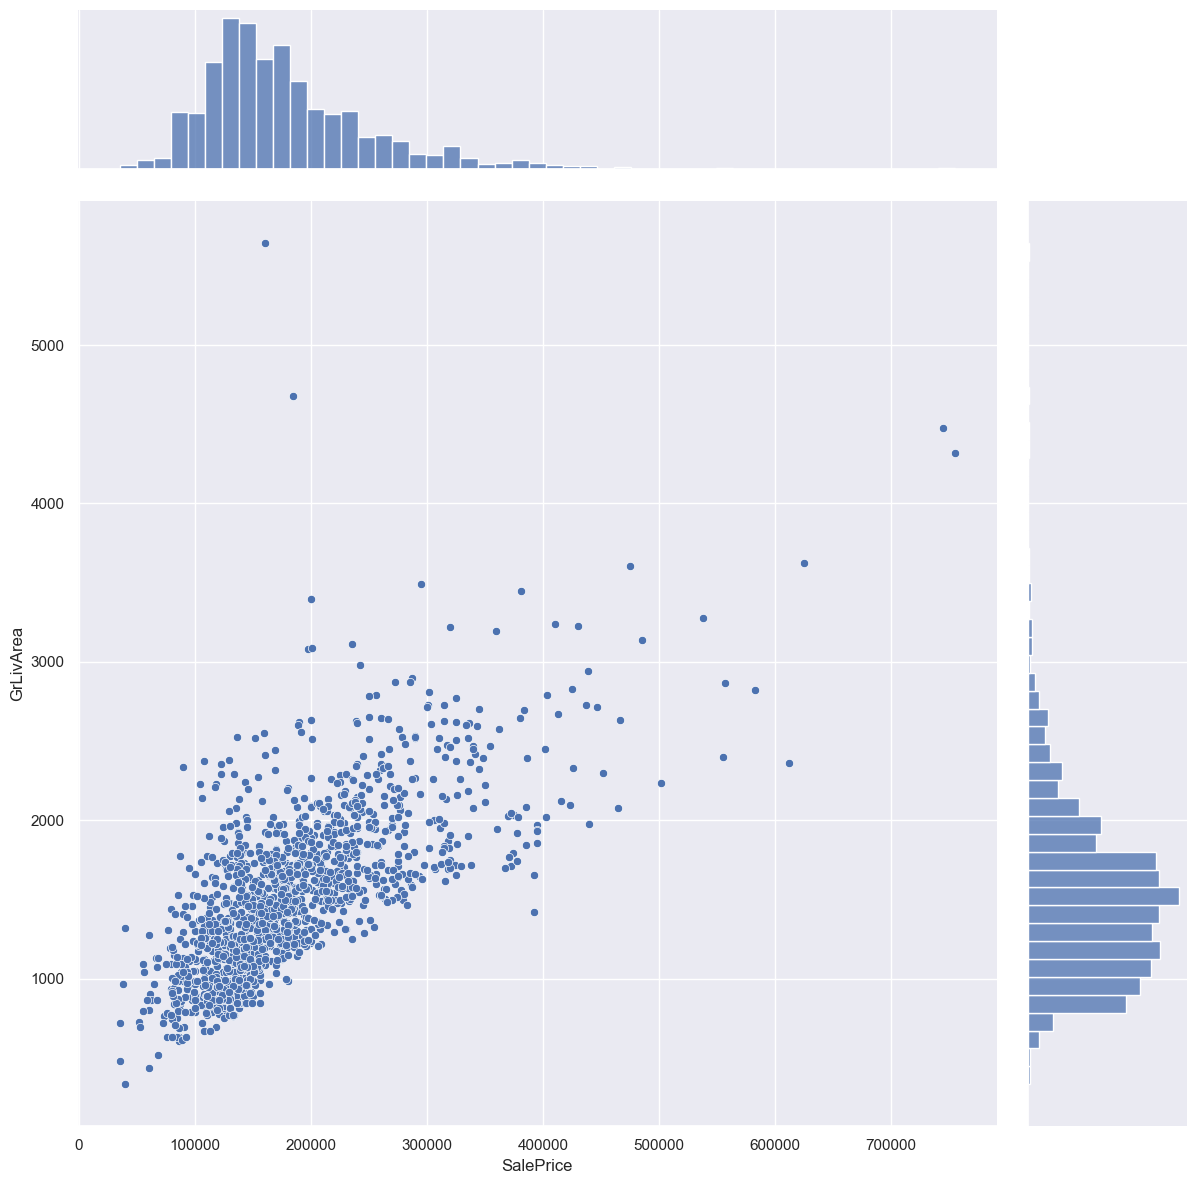

In [51]:
sb.jointplot(data = houseNumData, x = "SalePrice", y = "GrLivArea", height = 12)
#GrLivArea has the strongest linear relationship against SalePrice

In [ ]:
#Exercise3Problem2 U2421569C Hein San

In [57]:
houseCatData = pd.DataFrame(Traindata[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])

In [77]:
houseCatData = houseCatData.astype('category') #Method 1

In [ ]:
#Method2  houseCatData = houseCatData.astype({
 #   'MSSubClass': 'category',
  #  'Neighborhood': 'category',
  #  'BldgType': 'category',
  #  'OverallQual': 'category'
#})
#houseCatData['MSSubClass'] = houseCatData['MSSubClass'].astype('category')

In [79]:
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MSSubClass    1460 non-null   category
 1   Neighborhood  1460 non-null   category
 2   BldgType      1460 non-null   category
 3   OverallQual   1460 non-null   category
dtypes: category(4)
memory usage: 7.8 KB


In [81]:
houseCatData.describe()

,MSSubClass,Neighborhood,BldgType,OverallQual
count,1460,1460,1460,1460
unique,15,25,5,10
top,20,NAmes,1Fam,5
freq,536,225,1220,397


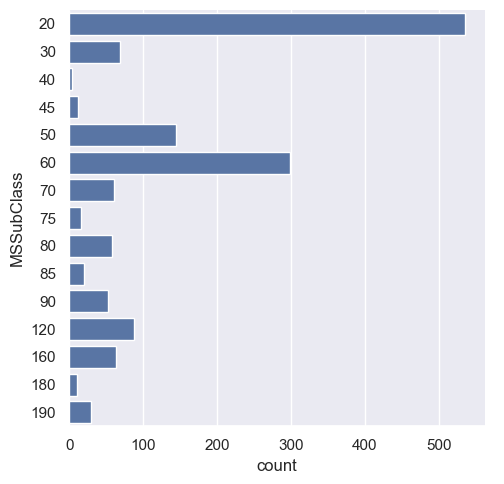

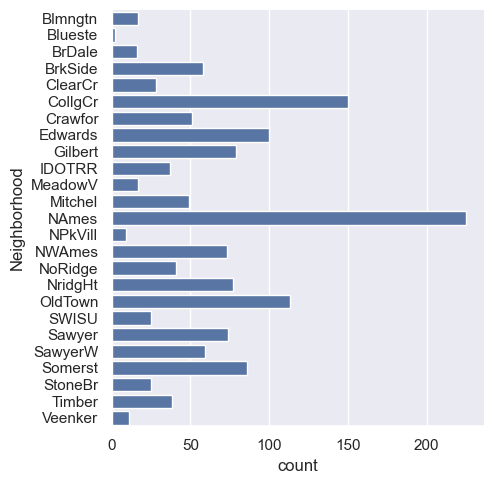

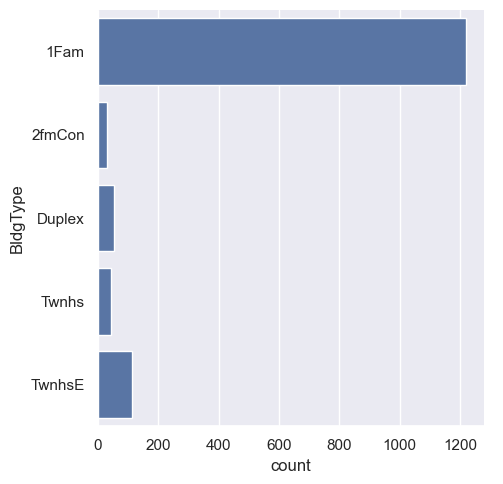

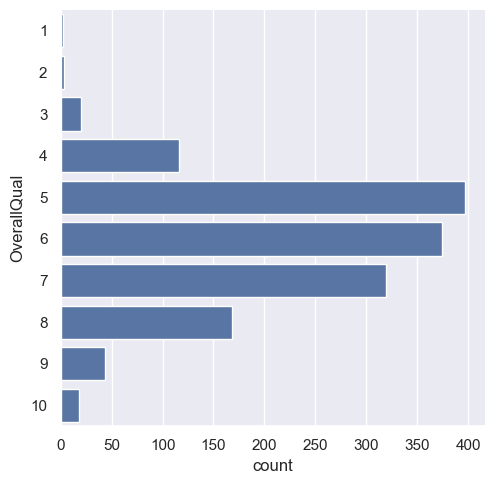

In [87]:
for i in houseCatData:
    sb.catplot(y=houseCatData[i], data = houseCatData, kind = "count")

<Axes: xlabel='MSSubClass', ylabel='OverallQual'>

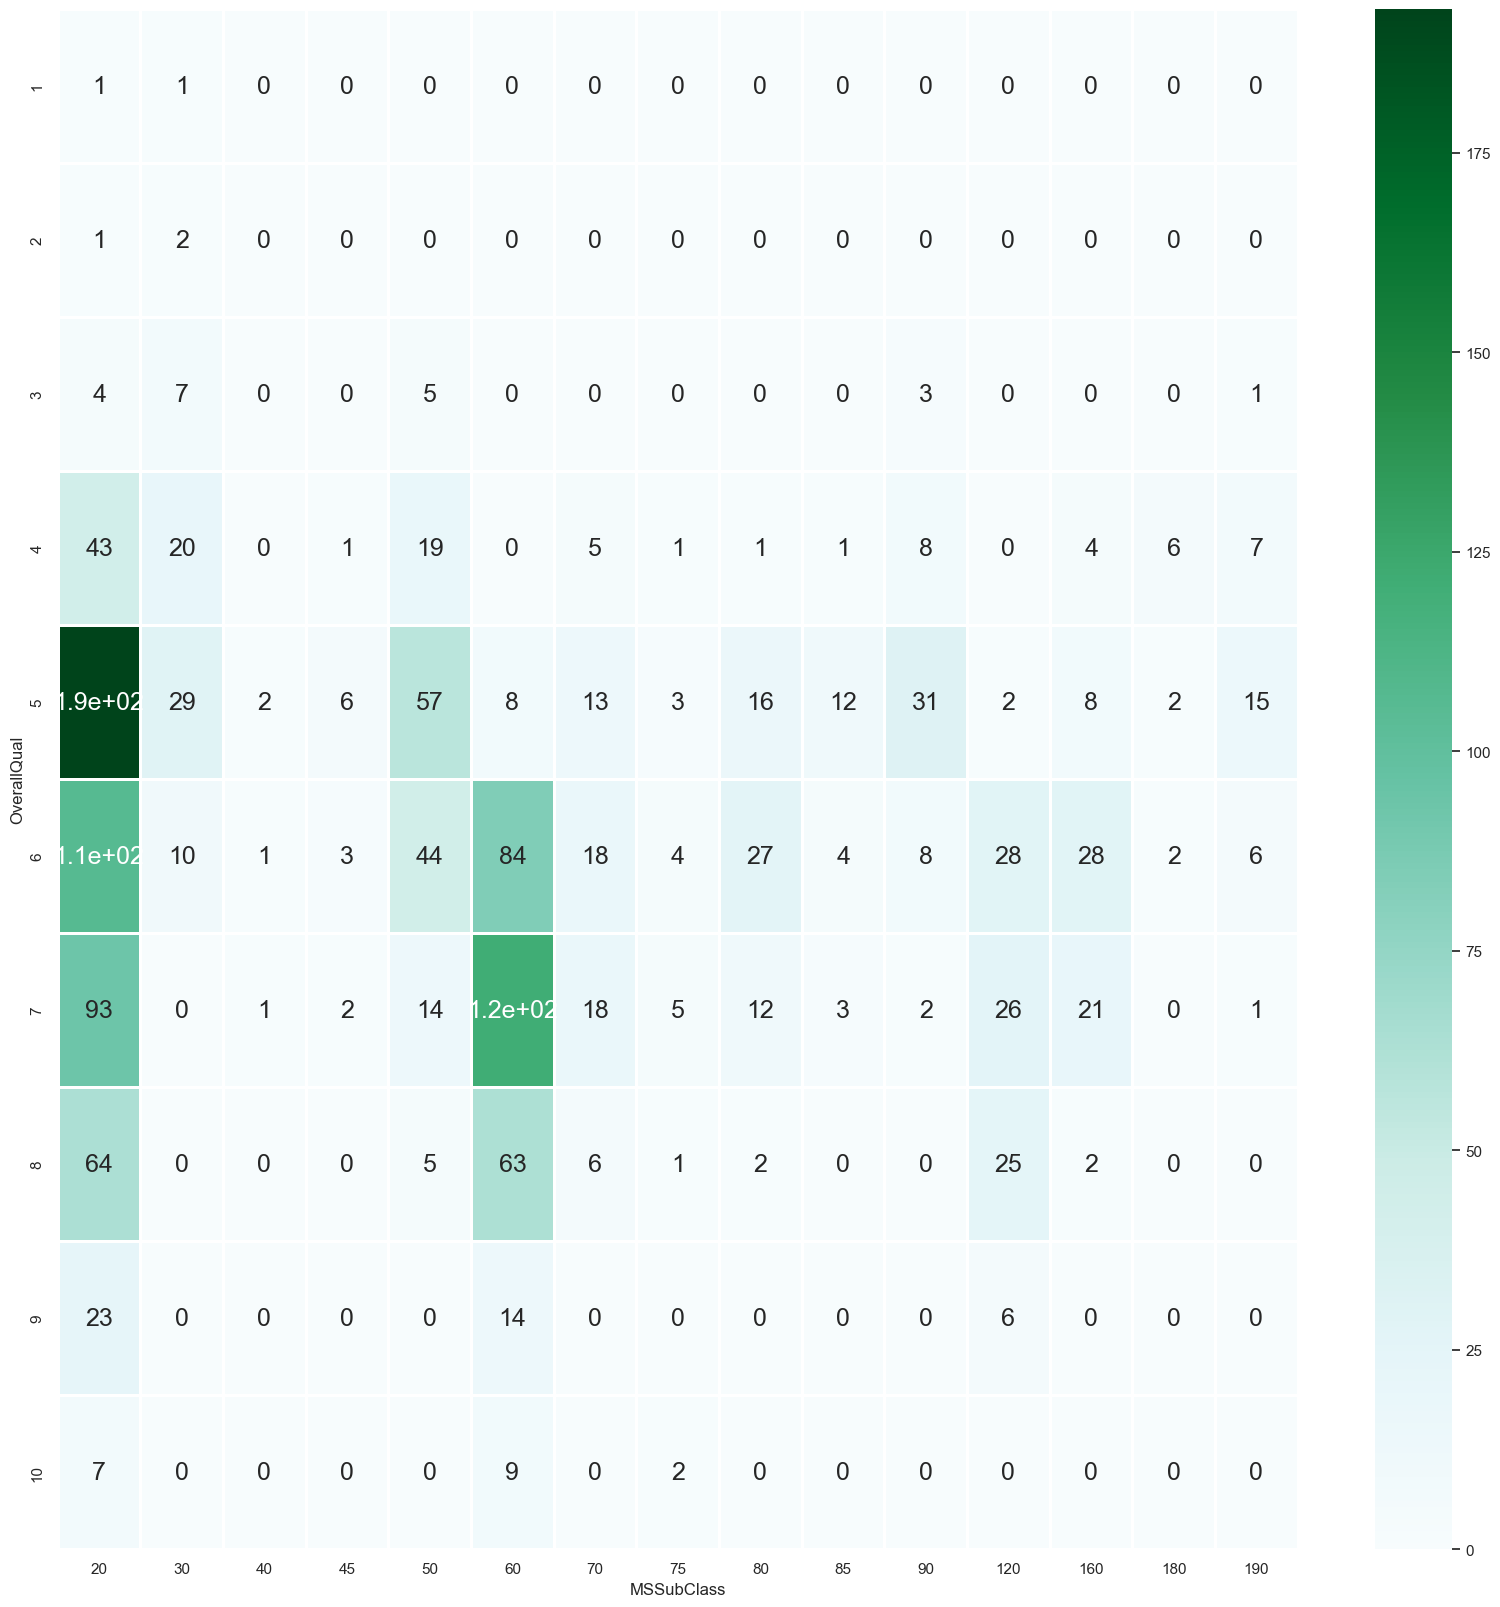

In [99]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(houseCatData.groupby(['OverallQual', 'MSSubClass'], observed=False).size().unstack(),
           linewidths=1, annot=True, annot_kws={"size": 18}, cmap="BuGn")

<Axes: xlabel='BldgType', ylabel='OverallQual'>

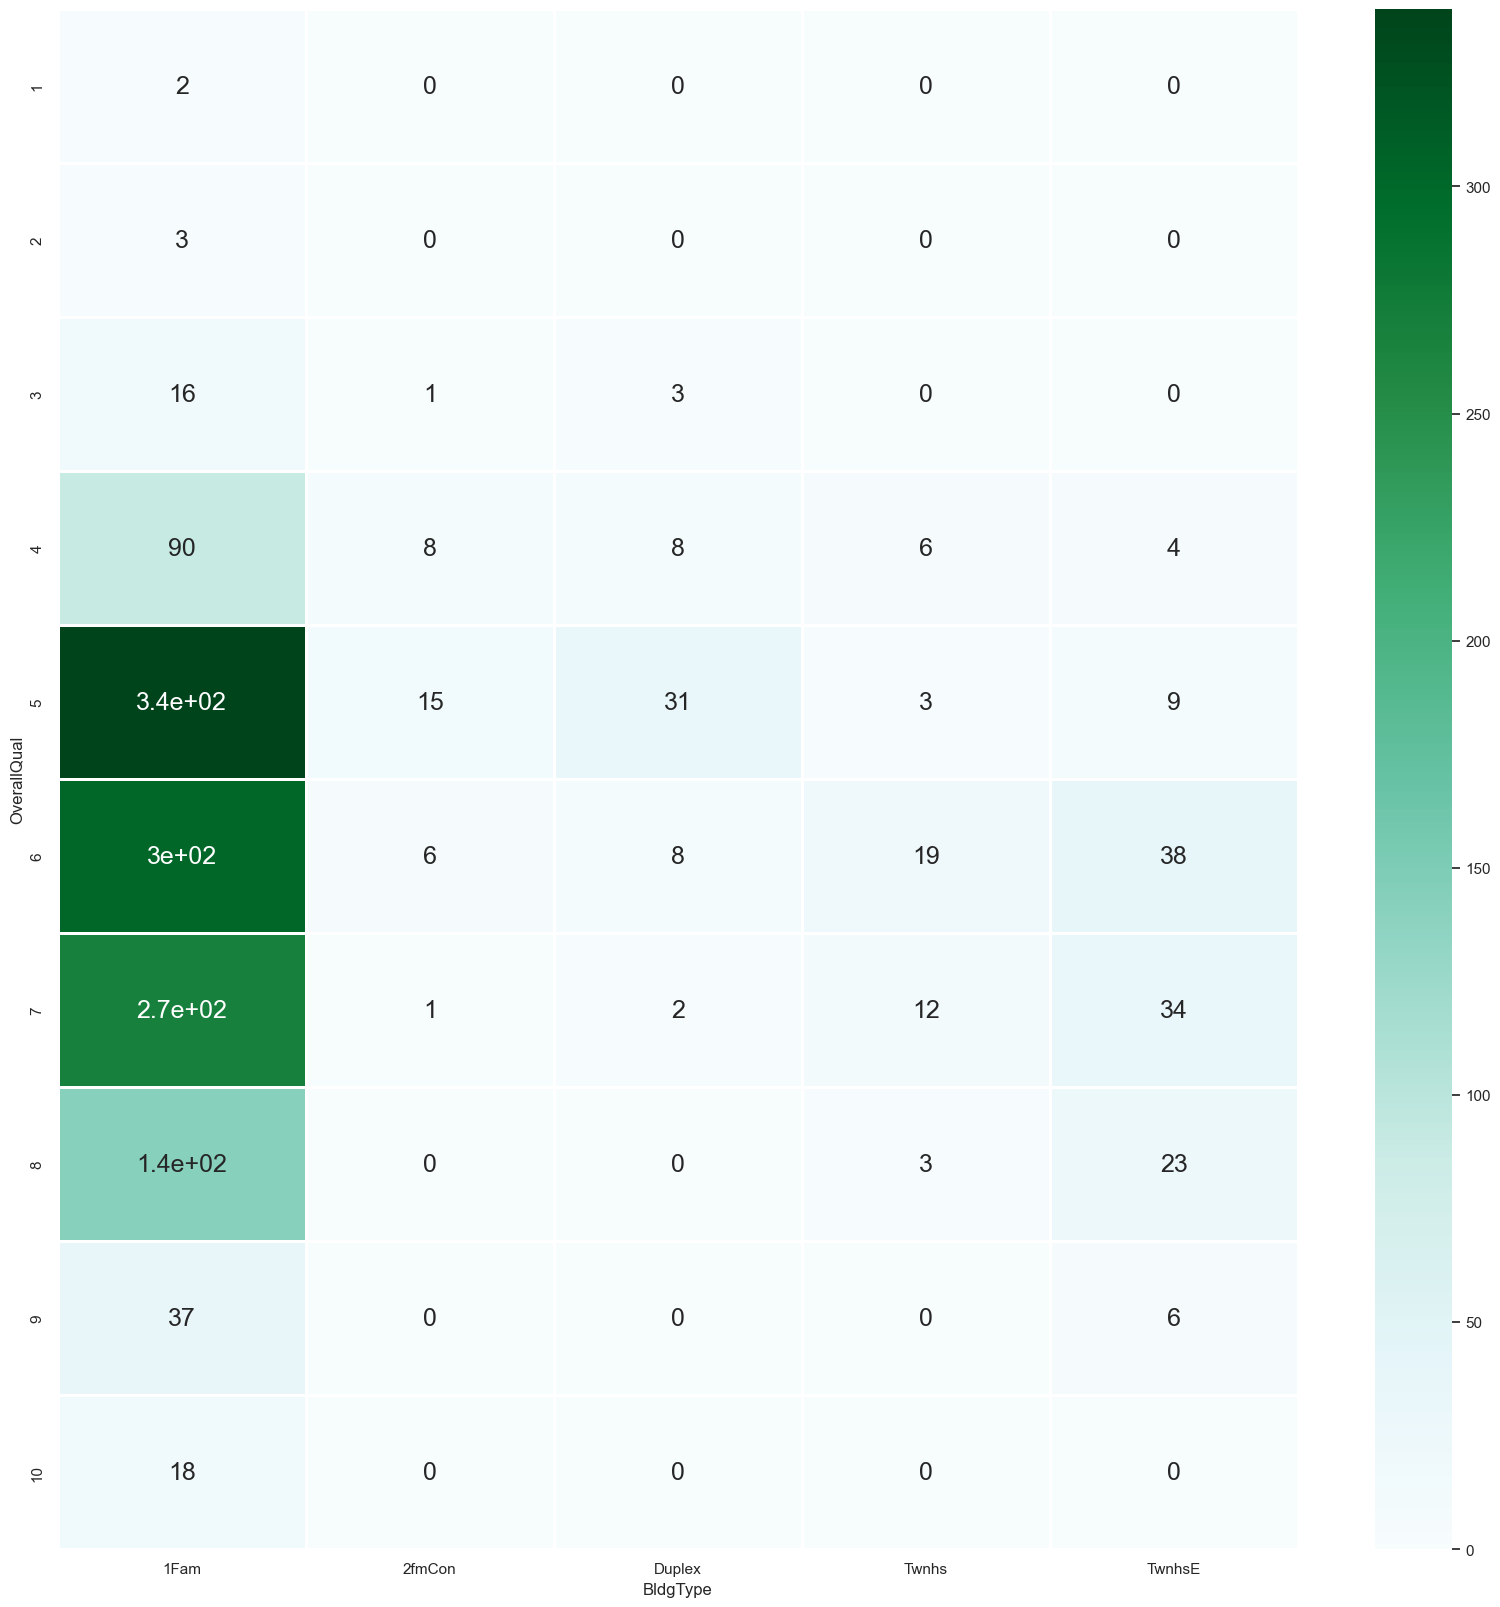

In [101]:
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(houseCatData.groupby(['OverallQual', 'BldgType'], observed=False).size().unstack(),
           linewidths=1, annot=True, annot_kws={"size": 18}, cmap="BuGn")

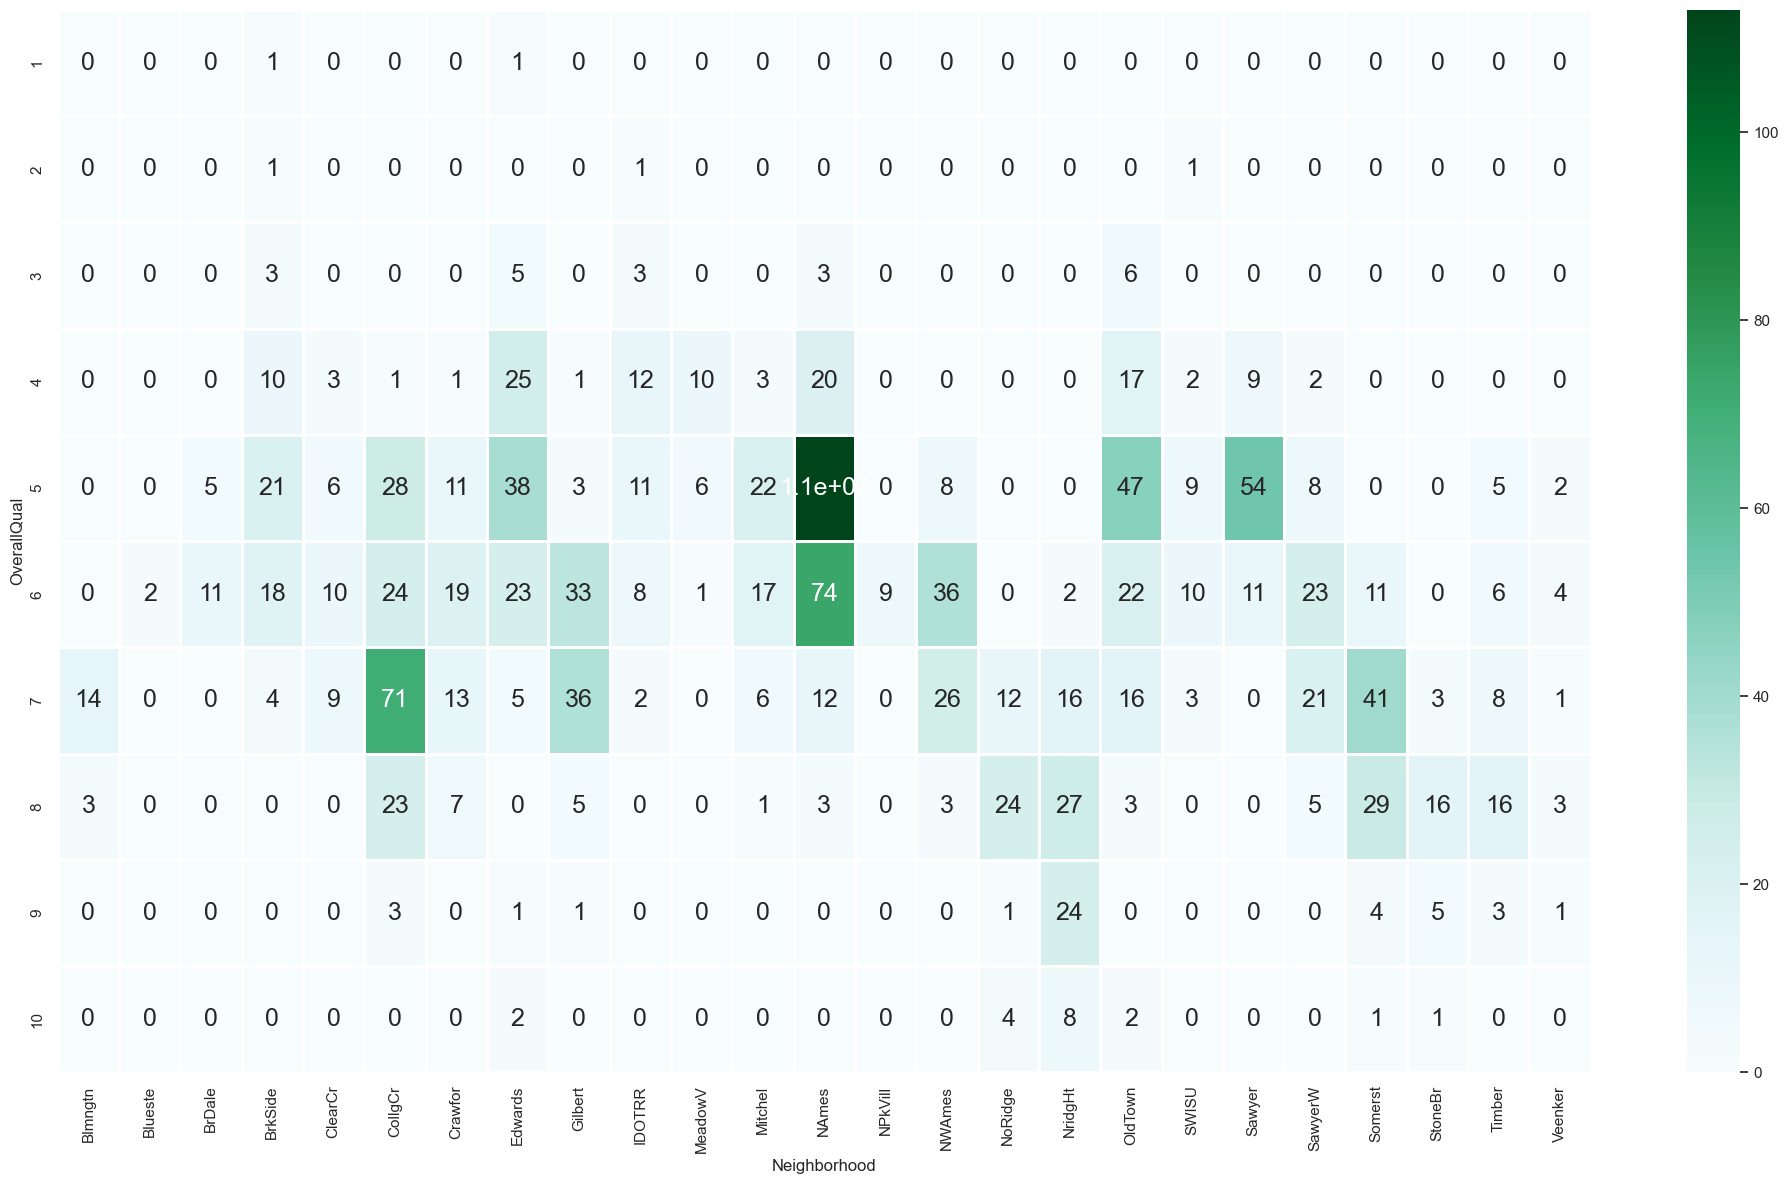

In [113]:
plt.figure(figsize=(20, 12))
sb.heatmap(houseCatData.groupby(['OverallQual', 'Neighborhood'], observed=False).size().unstack(),
           linewidths=1, annot=True, annot_kws={"size": 18}, cmap="BuGn")
plt.tight_layout()
plt.show()

In [ ]:
#The various heatplots shows the frequencies of the various combinations when comparing OverallQual with the other variables; shows density of frequencies of the various combinations.

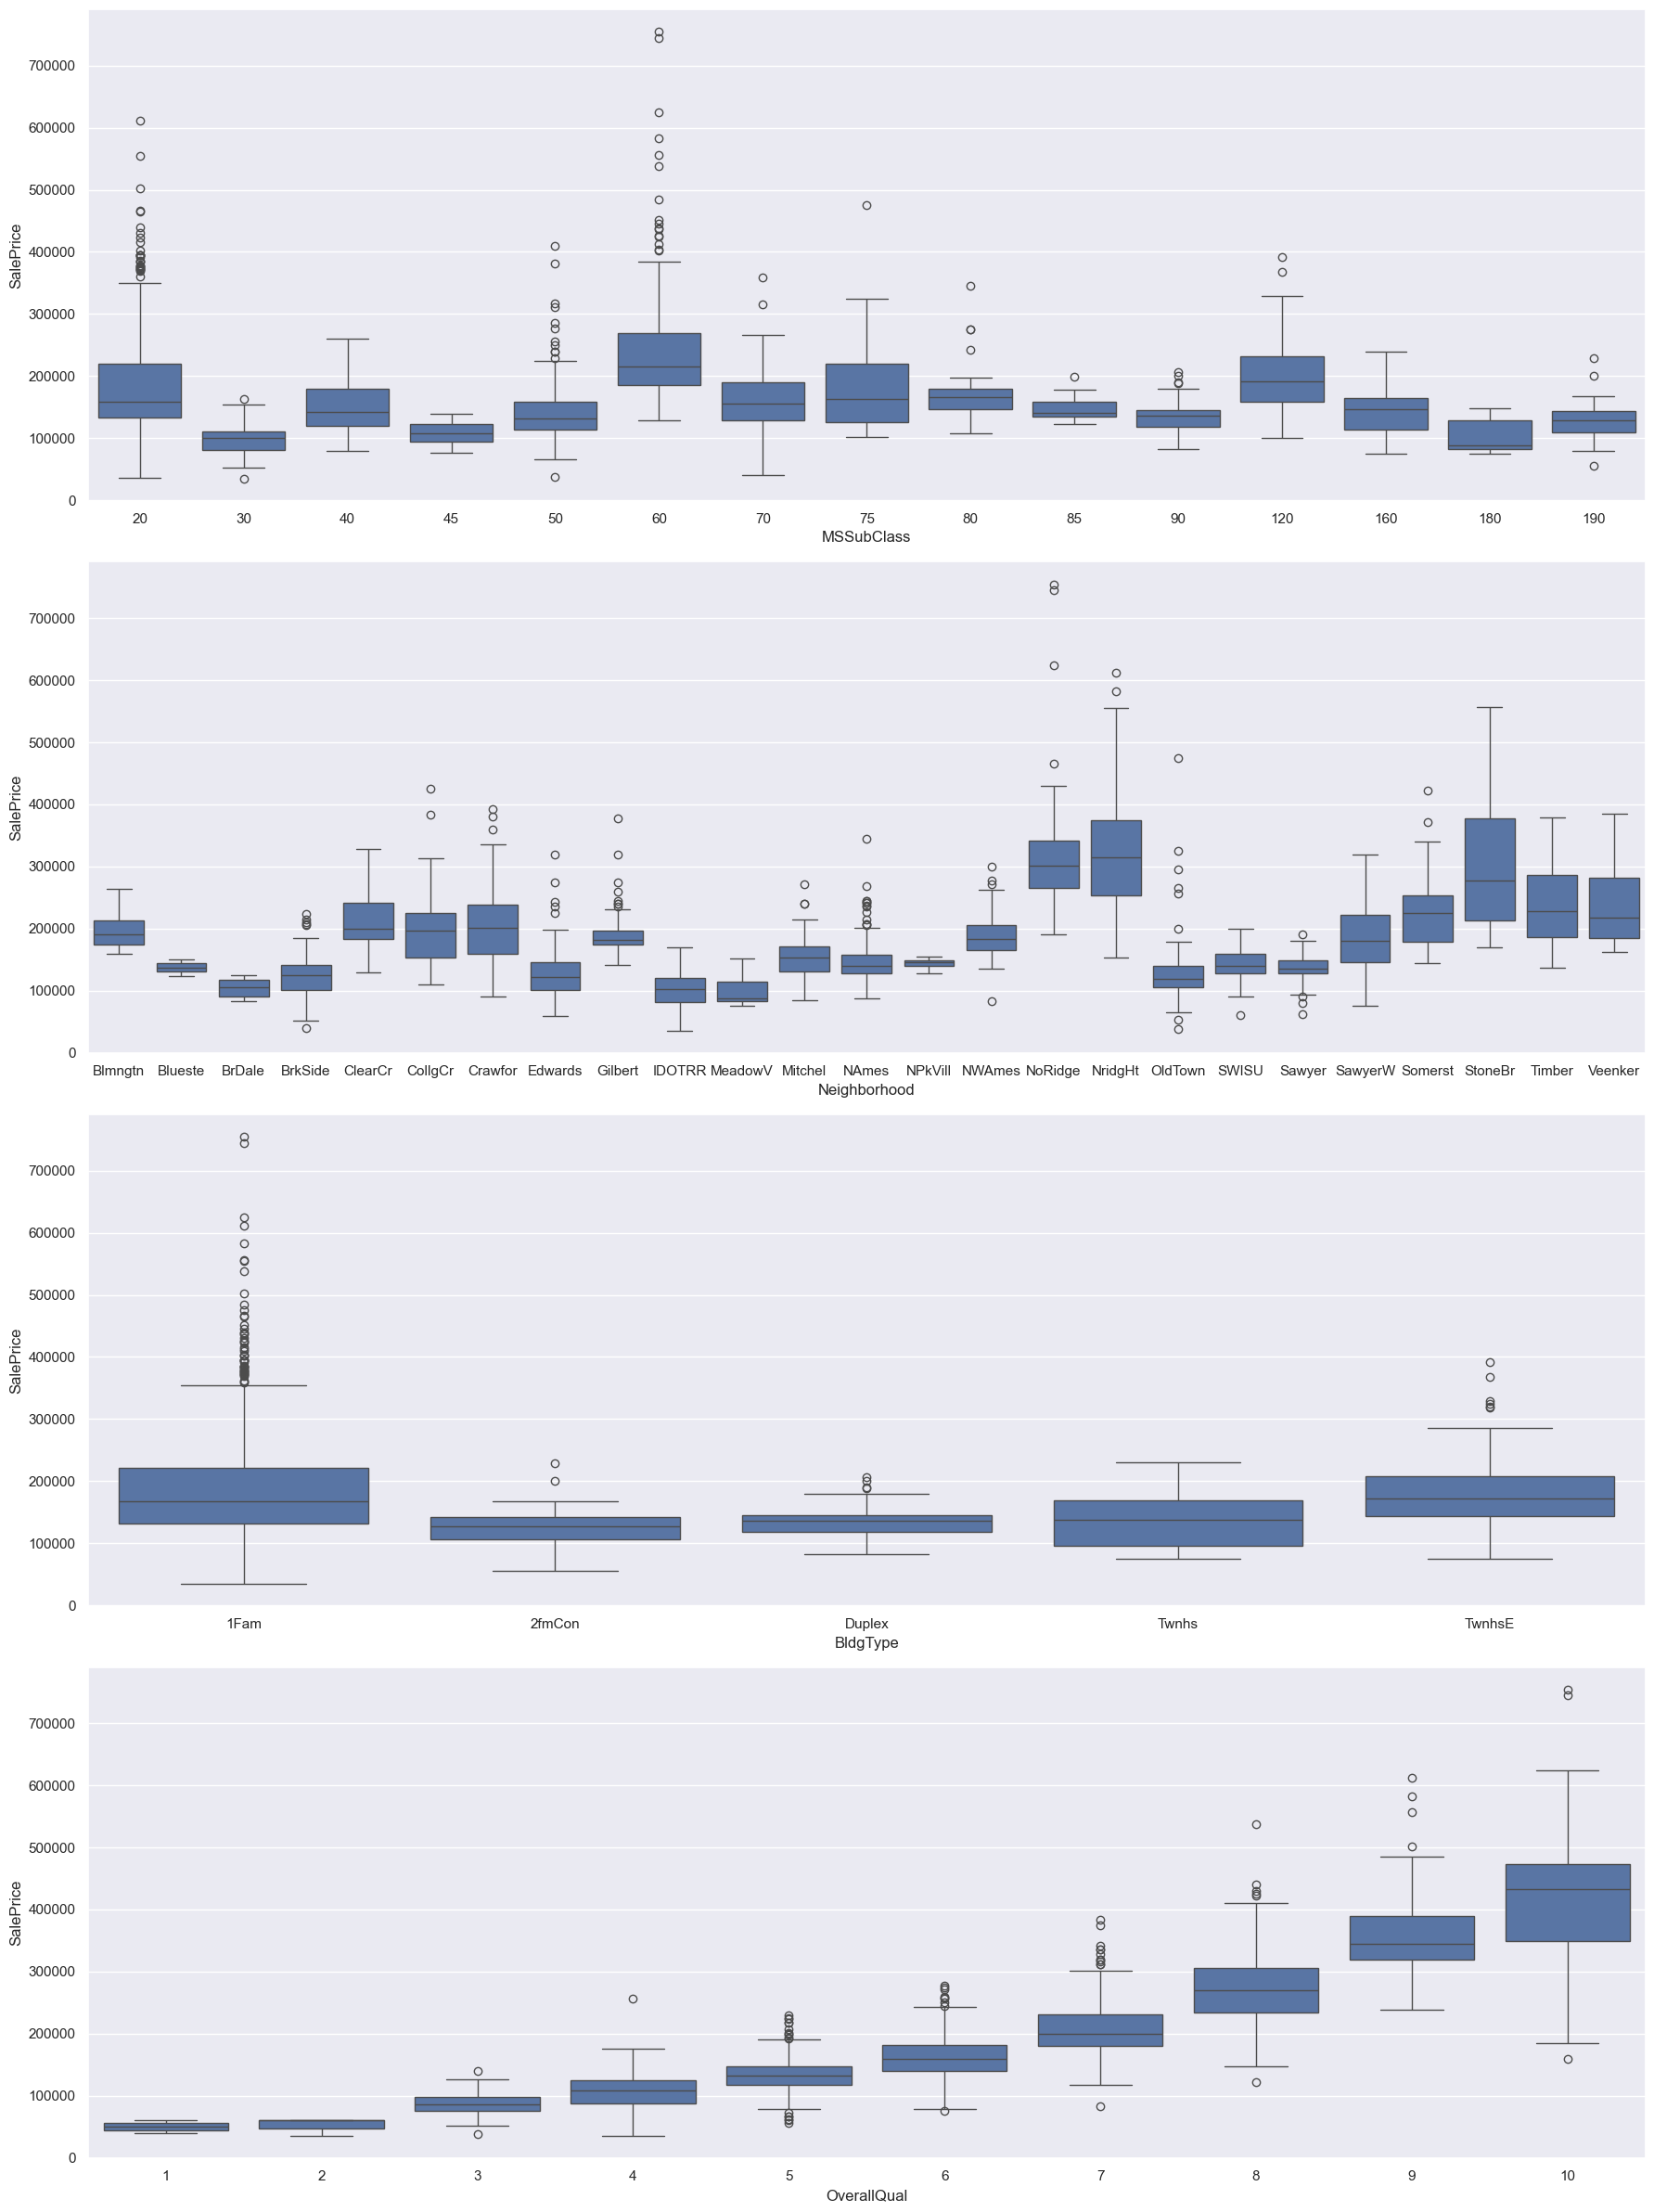

In [133]:
f, axes = plt.subplots(4, 1, figsize=(18, 24))

count = 0
for var in houseCatData:
    sb.boxplot(x = houseCatData[var], y=houseNumData["SalePrice"], ax=axes[count])
    count += 1
plt.tight_layout()

In [ ]:
#OverallQual has the most influence in predicting SalePrice as the saleprices goes up overall as OverallQual gets better